<a href="https://colab.research.google.com/github/nallagondu/DATASCIENCE-practice/blob/featurebranch/datatrain_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# GitHub raw file URL
url = "https://raw.githubusercontent.com/nallagondu/datatrained-training-ml-Files/main/Advertising.csv"


In [22]:

# Read the CSV file from the URL
data = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(data.head())

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [23]:
data.shape

(200, 5)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [24]:
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

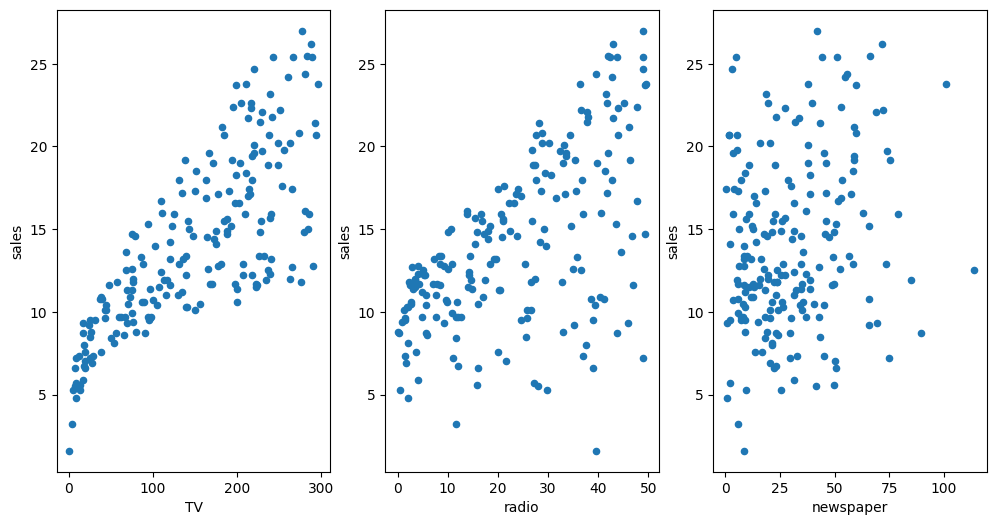

In [25]:
fig, axs = plt.subplots(1,3)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(12,6))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])
fig.savefig('testdata.jpg')

In [27]:
#Create x = feature and Y = label
X = data[['TV']]
y = data.sales

#follow the usual sklearn pattern : import ,instantiate,fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [28]:
#print interset and coefficent
print(lm.intercept_)
print(lm.coef_)

7.032593549127695
[0.04753664]


Interpeting the Model
How do we interpret the coefficient for spends on TV ad (beta1)?


In [29]:
7.032593549127695 + 0.04753664*50


9.409425549127695

In [30]:
lm.predict([[50]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.40942557])

R-Squared

In [32]:
from sklearn.metrics import r2_score
predicted_sales = lm.predict(X)

https://www.desmos.com/3d/f887852906

In [33]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [34]:
predicted_sales

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

In [35]:
#compate original sales with modelpredicted sales
r2_score(y_true=y,y_pred=predicted_sales)

0.611875050850071

**R-Squared vs. Adjusted R-Squared**
R-squared only works as intended in a simple linear regression model with one explanatory variable. With a multiple regression made up of several independent variables, the R-squared must be adjusted.

The adjusted R-squared compares the descriptive power of regression models that include diverse numbers of predictors. Every predictor added to a model increases R-squared and never decreases it. Thus, a model with more terms may seem to have a better fit just for the fact that it has more terms, while the adjusted R-squared compensates for the addition of variables; it only increases if the new term enhances the model above what would be obtained by probability and decreases when a predictor enhances the model less than what is predicted by chance.

In an overfitting condition, an incorrectly high value of R-squared is obtained, even when the model actually has a decreased ability to predict. This is not the case with the adjusted R-squared.

**R-Squared vs. Beta**
Beta and R-squared are two related, but different, measures of correlation. Beta is a measure of relative riskiness. A mutual fund with a high R-squared correlates highly with a benchmark. If the beta is also high, it may produce higher returns than the benchmark, particularly in bull markets.

R-squared measures how closely each change in the price of an asset is correlated to a benchmark. Beta measures how large those price changes are relative to a benchmark. Used together, R-squared and beta can give investors a thorough picture of the performance of asset managers. A beta of exactly 1.0 means that the risk (volatility) of the asset is identical to that of its benchmark.

Essentially, R-squared is a statistical analysis technique for the practical use and trustworthiness of betas of securities.


**Limitations of R-Squared**
R-squared will give you an estimate of the relationship between movements of a dependent variable based on an independent variable’s movements. However, it doesn’t tell you whether your chosen model is good or bad, nor will it tell you whether the data and predictions are biased.

A high or low R-squared isn’t necessarily good or bad—it doesn’t convey the reliability of the model or whether you’ve chosen the right regression. You can get a low R-squared for a good model, or a high R-squared for a poorly fitted model, and vice versa.

**What is a ‘good’ R-squared value?**
What qualifies as a “good” R-squared value will depend on the context. In some fields, such as the social sciences, even a relatively low R-squared value, such as 0.5, could be considered relatively strong. In other fields, the standards for a good R-squared reading can be much higher, such as 0.9 or above. In finance, an R-squared above 0.7 would generally be seen as showing a high level of correlation, whereas a measure below 0.4 would show a low correlation. This is not a hard rule, however, and will depend on the specific analysis.

**What does an R-squared value of 0.9 mean?**
Essentially, an R-squared value of 0.9 would indicate that 90% of the variance of the dependent variable being studied is explained by the variance of the independent variable. For instance, if a mutual fund has an R-squared value of 0.9 relative to its benchmark, this would indicate that 90% of the variance of the fund is explained by the variance of its benchmark index.

In [36]:
x = data[['TV', 'radio', 'newspaper']]
y = data.sales
lm = LinearRegression()
lm.fit(x, y)
print('Intercept : -> ',lm.intercept_)
print('TV : -> ',lm.coef_[0])
print('Radio : -> ',lm.coef_[1])
print('Newspaper : -> ',lm.coef_[2])

Intercept : ->  2.938889369459412
TV : ->  0.0457646454553976
Radio : ->  0.18853001691820448
Newspaper : ->  -0.0010374930424763285


**How do we interpret these coeffecients?**
if we look at the coeffeients,the coefficient for the newspaper spends in negitive.
it means that the money spent for newspapers advertisemens is not contributing in a positive way to the sales

**Feature selection**
How do I decided which fearure have to be included in a linear model ?

In [37]:
#Preparing data for r2_score on TV and radio as we can see they are positively related (co-efficient)
x = data[['TV','radio']]
y = data.sales

In [38]:
#let's feed features and label and train the model
lm.fit(x,y)

LinearRegression()

In [39]:
#check the r2
predicted_sales = lm.predict(x)
r2_score(y,predicted_sales)


0.8971942610828957

In [40]:
#Do the same for all fetures
x = data[['TV','radio','newspaper']]
y = data.sales
lm.fit(x,y)

predicted_sales = lm.predict(x)
r2_score(y,predicted_sales)

0.8972106381789522

In above model,even we added the newspaper there is no chneg in value .so we have to thing the use of newspaper investment plan is usefull or not .

**Project_1 with Linear regression**
we need to prediect the chance od admission bases on the students various scores
fature or independent varaibles

1.GRE score
2.TOEFL score
3.University Rating
4.SOP
5.LOR
6.CGPA
7.research

**Label/Target **
Change of admit

always refer sklearn official doc if you are not sure about the syntax of predection

https://scikit-learning.org



In [41]:
#lets start with importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')



In [42]:
#read CSV file and convert into data frame
# GitHub raw file URL
url = "https://raw.githubusercontent.com/nallagondu/datatrained-training-ml-Files/main/Admission_Prediction.csv"
data = pd.read_csv(url)
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [43]:
data.shape

(500, 9)

**DATA PRE-PROCESSING STEPS**(70 -80 % time spend here  remaining model building)


1.Data cleaning

2.EDA(ANALYSIS)

3.Finding and treating Outliners(if any)

4.feature selection for modelbuilding

5.Data standardization

6.Train test Split


In [44]:
# DATA PRE-PROCESSING
#1.Data cleaning
#2.EDA(ANALYSIS)
#3.Finding and treating Outliners(if any)
#4.feature selection for modelbuilding
data = data.drop(columns = ['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [45]:
#Understand data at high level.Check the statistics of data setdata.describe()
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [46]:
#fill the null values
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score'] = data['GRE Score'].fillna(data['GRE Score'].mean())


In [47]:
# verify if NaN's are filled
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [49]:

data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


In [50]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Now the data looks good and tehre are no missing values.Also the first colun is just serial numbers ,so we can don't need that column.
lets drop it form data and made it more clear



Lets visualize the data

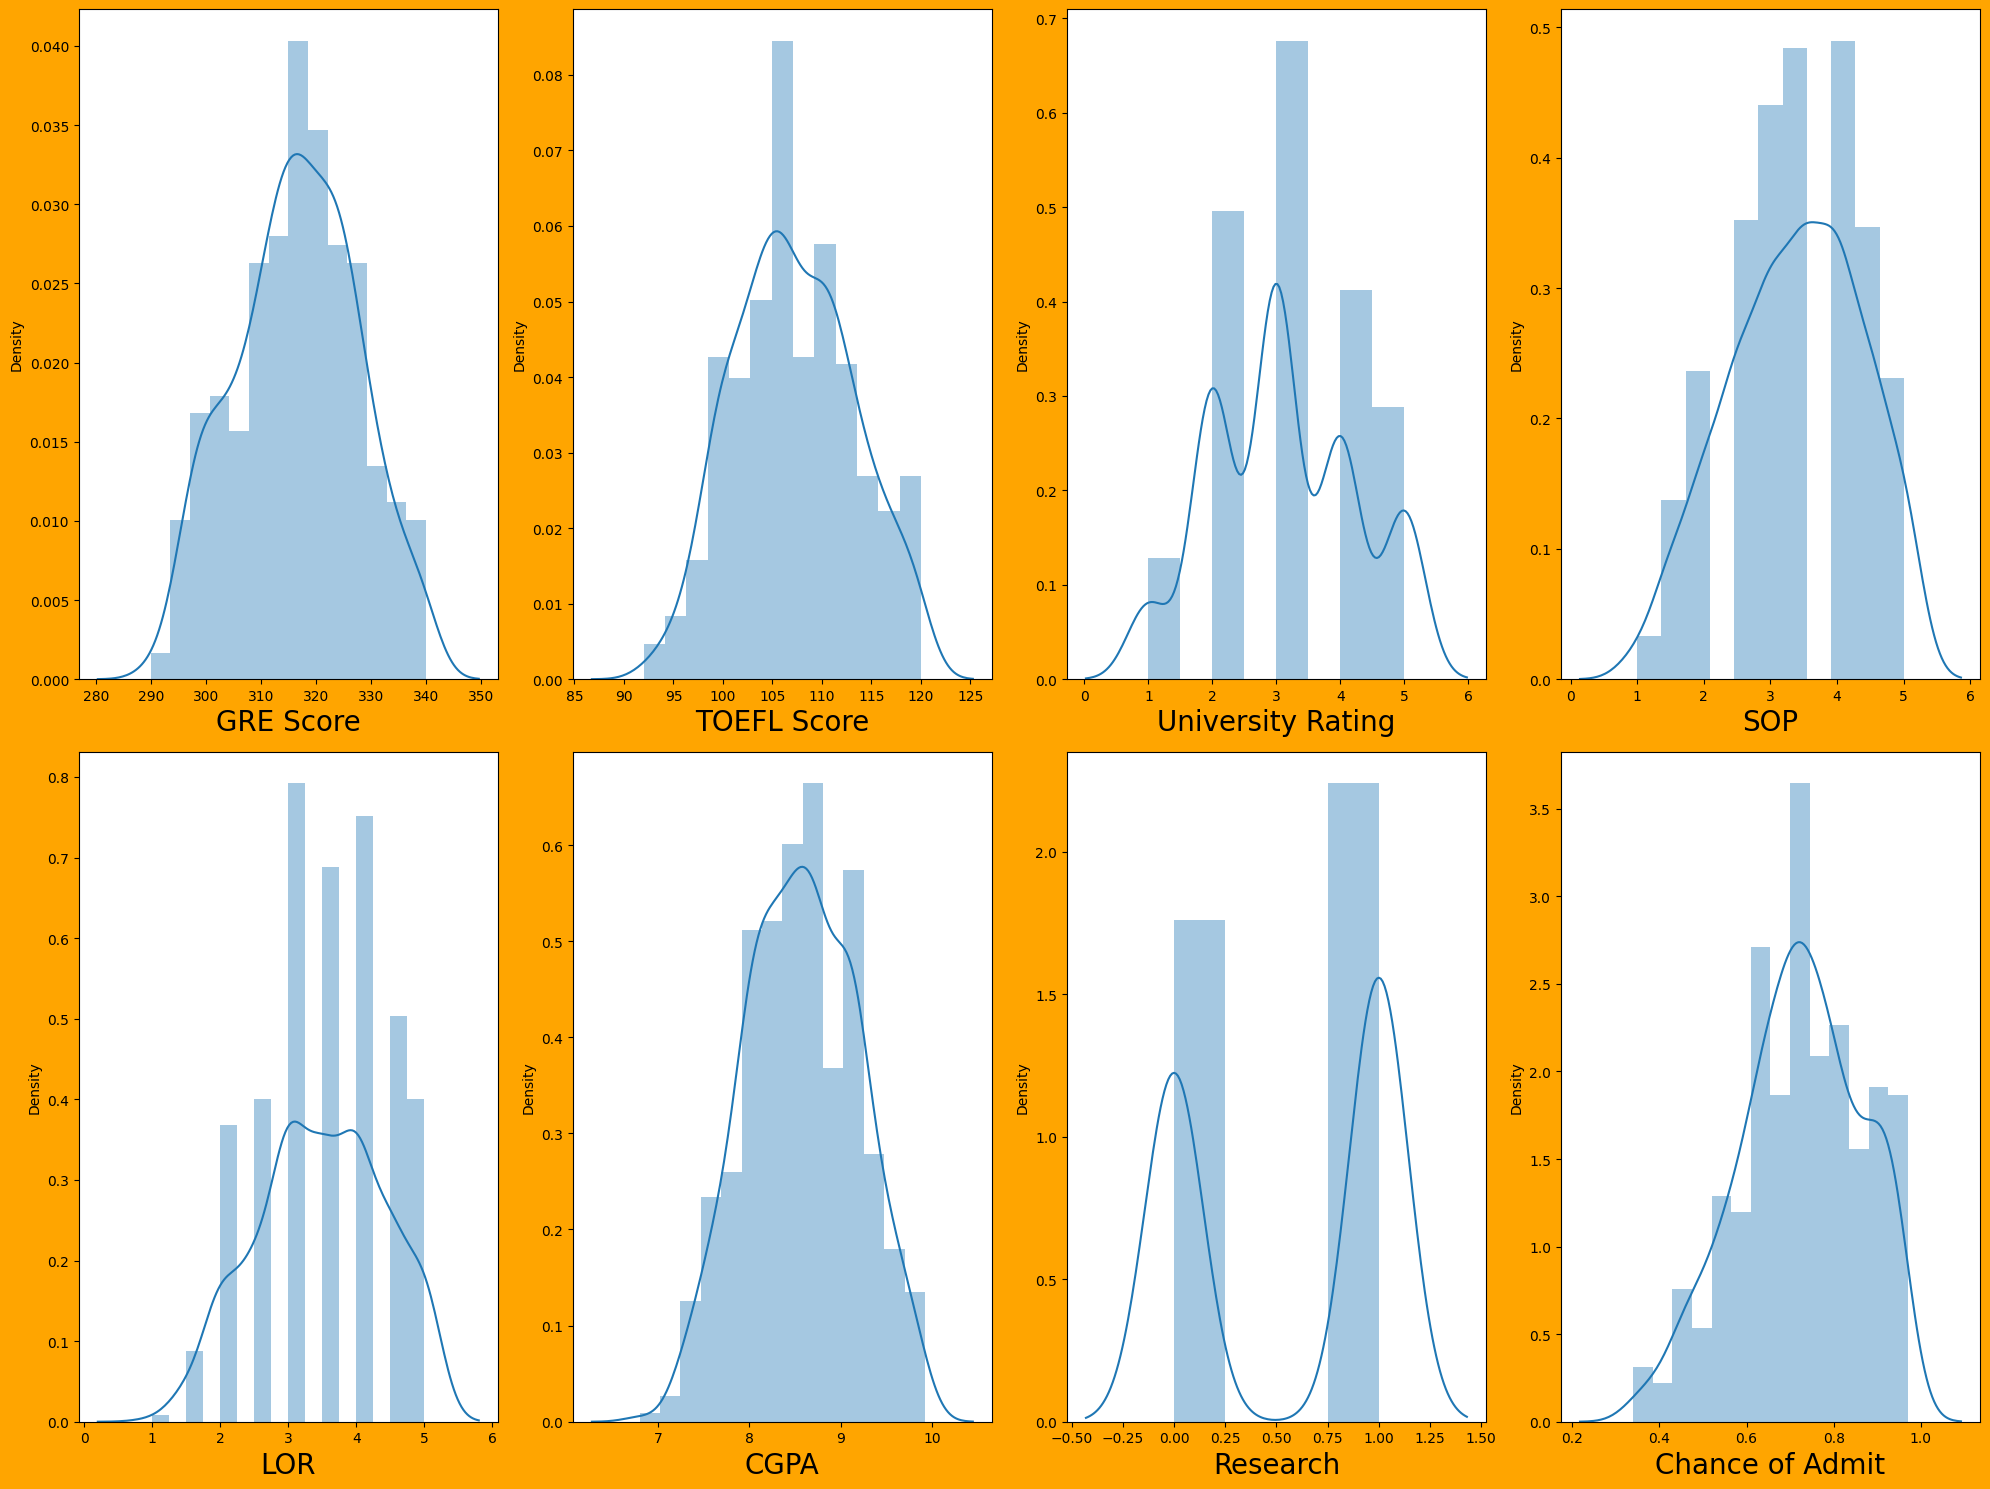

In [52]:
#lets see how the data is distributed for every column

plt.figure(figsize=(20,15), facecolor='orange')
plotnumber = 1

for column in data:
    if plotnumber<=8:
         ax = plt.subplot(2,4,plotnumber)
         sns.distplot(data[column])
         plt.xlabel(column,fontsize=20)

    plotnumber+=1
plt.tight_layout()

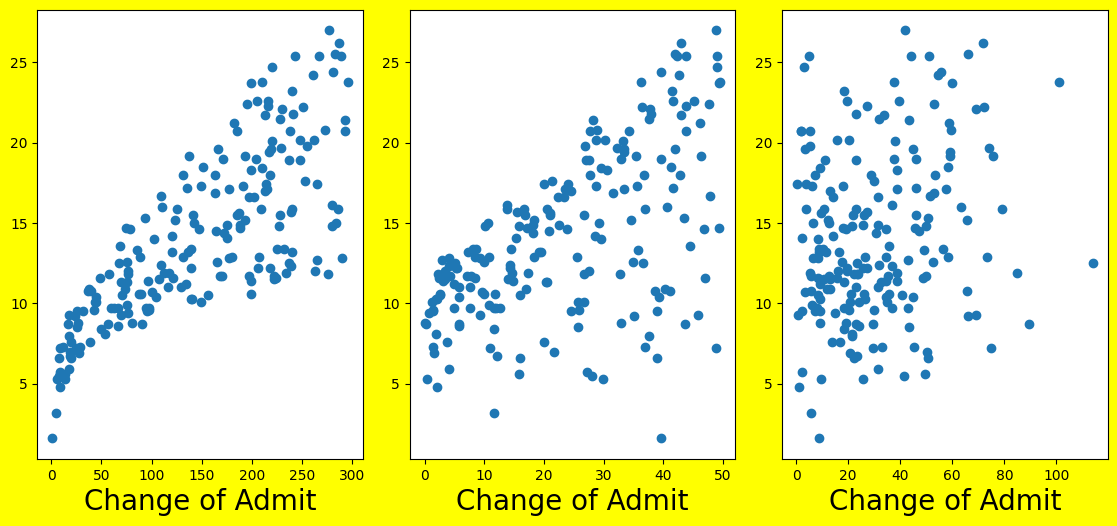

In [53]:
#lets see how the data is distributed for every column
#Visualizing relation ship
plt.figure(figsize=(15,10), facecolor='yellow')
plotnumber = 1

for column in x:
    if plotnumber<=8:
         ax = plt.subplot(2,4,plotnumber)
         plt.scatter(x[column],y)
         plt.xlabel(column,fontsize=10)
         plt.xlabel('Change of Admit',fontsize=20)

    plotnumber+=1
plt.tight_layout()